# Online Retails Purchase

### Introduction:



### Step 1. 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 그래프에 스킨 입히기
sns.set(style="ticks")

### Step 3. `online_rt` 변수에 데이터 불러오기
Note: 만약 utf-8 decode error가 나온다면, `pd.read_csv()` 안에 `encoding = 'latin1'` 선언하기!.

In [3]:
online_rt = pd.read_csv('Online_Retail.csv', encoding='latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. UK를 제외하고 `Quantity`가 가장 많은 상위 10개국의 히스토그램 생성하기

/var/folders/f8/x5k7p6sd7v7fcpwzjwsdc79h0000gn/T/ipykernel_46361/349187907.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


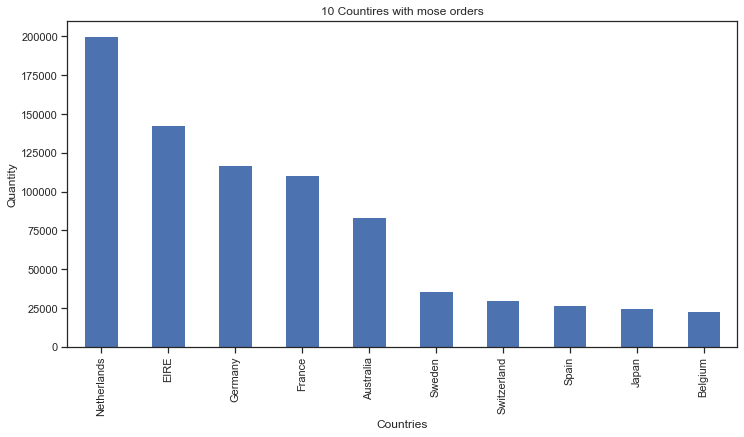

In [5]:
# 'gtouby'로 'Contry' 그룹화하기
countries = online_rt.groupby('Country').sum()

# 'Quantity'로 값을 정렬한 뒤 UK를 제외한 상위 10개 가져오기
countries = countries.sort_values(by = 'Quantity',ascending=False)[1:11]

# plot 만들기! kind 파라미터는 bar로
#코드작성#
plt.figure(figsize=(12,6))
countries['Quantity'].plot(kind='bar')
# x축의 라벨은 'Contries', y축의 라벨은 'Quantity'로 설정하기, 제목은 마음대로
#코드 작성#
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countires with mose orders')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
# show the plot
plt.show()

### Step 5.  `Quantity` 의 값이 음수인 데이터 삭제하기

In [6]:
online_rt = online_rt[online_rt['Quantity'] >= 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. 영국을 제외한 Top 3개국에 대한 `CustomerID` 별 `Quantity` 당 `UnitPrice`로 scatterplot 만들기

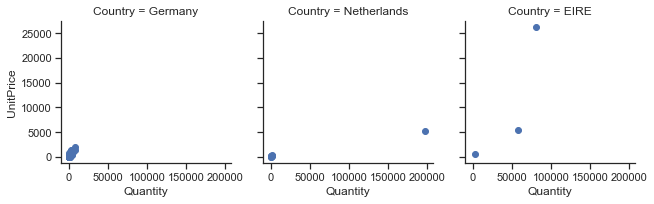

In [8]:
# # groupby CustomerID
# customers = online_rt.groupby('CustomerID')

# # 'UnitPrice'가 음수인 값 삭제
# customers = customers[customers['UnitPrice'] >= 0]

# # 'Country' 칼럼에 인덱스 넣기
# customers['Country'] = online_rt.unique()

# # top three countries
# top_countries =  ['Netherlands', 'EIRE', 'Germany']

# # 위 top_countries로 데이터 걸러내기
# customers =

top3 = ['Netherlands', 'EIRE', 'Germany']
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers = customers[customers['UnitPrice'] >= 0]
customers['Country'] = customers.index.get_level_values(1)
customers = customers[customers['Country'].isin(top3)]

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

### Step 7. Step 6 결과가 왜 유의미하지 않게 나왔는지 조사해보기
#### Step 7.1 Step 6의 첫번째 코드 줄을 보고 문제가 발생하는지 알아보기
##### Step 7.1.1 첫번째 코드 줄을 실행한 후 5개의 데이터를 출력하여 제대로 출력되는지 확인하기

In [10]:
#초기 데이터 프레임 그룹을 주로 'CustomerID'로 그룹화하고 두 번째로 'Country'로 그룹화합니다.
#각 그룹 아래에 숫자 값이 있는 모든(인덱스가 아닌) 열을 합산합니다.
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers.head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


##### Step 7.1.2  위 코드가 보여주는 것에 대해 생각해보고 `UnitPrice`의 자료형을 출력해보기

In [11]:
customers['UnitPrice'].dtype

dtype('float64')

##### Step 7.1.3 `online_rt` 변수에서 `CustomerID`의 값이 12346.0 인 데이터와 12347.0인 데이터를 따로 분리해서 출력해보기

In [13]:
display(online_rt[online_rt['CustomerID'] == 12346.0])
print('\n')
display(online_rt[online_rt['CustomerID'] == 12347.0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Step 7에 대한 문제를 다시 생각해보기

우리가 다루고 있던 문제를 반복하기 위해:  
**"상위 3개 국가에 대한 `CustomerID`별 `UnitPrice`당 `Quantity`로 scatterplot(산점도) 생성"**  

이 문제는 다양한 해석이 가능하기 때문에, 우리는 명확하게 해야합니다.  

상위 3개국의 모든 데이터를 살펴봄으로써 단일 plot을 생성할 수 있으며, 또는 국가당 하나의 단일 plot을 생성할 수 있습니다.  
나머지 문제와의 일관성을 유지하려면 후자를 따라야 합니다.  

하지만 무엇이 상위 3개국입니까? 아래와 같은 두 가지의 다른 답이 제시될 수 있습니다.  
- 총 판매량(즉, 총 판매 수량)
- 총 판매액(즉, 매출)

이번 문제는 판매량을 위한 것이므로, 이를 염두에 두고 공부해야 합니다.

##### Step 7.2.1 판매량 기준 상위 3개국 찾기

In [124]:
online_rt.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)[1:4].index

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [125]:
online_rt.drop('TotalPrice', axis=1, inplace=True)

##### Step 7.2.2 

이제 우리는 상위 3개국을 알고 있으므로, 나머지 문제들에 집중하여 해결할 수 있습니다.  
**"`CustomerID`별 `UnitPrice`당 `Quantity`"** 우리는 이 문제를 해결해야 합니다.  


`CustomerID`별 부분은 쉽습니다. 즉, plot에서 `CustomerID`당 하나의 점을 plotting 할 것이고, 이는 `CustomerID` 별로 **그룹화** 함을 의미합니다.  
`UnitPrice`당 `Quantity`가 조금 더 까다롭습니다. 먼저, 우리가 알고 있는 내용은 아래와 같습니다.  
- x축, y축 중 하나의 축은 주어진 고객에게 할당된 수량을 나타냅니다. 우리는 각 고객에 대한 총 수량을 표시할 수 있으므로 이 문제는 쉽게 해결됩니다.  
- 다른 축은 주어진 고객에게 할당된 단가를 나타냅니다. 한 고객이 가격이 다른 주문을 얼마든지 할 수 있으므로, 가격을 요약하는 것은 큰 도움이 되지 않습니다.  
게다가 `CustomerID`당 `Quantity`는 큰 의미를 가지지 않으며, 그 의미가 명확하지 않아 고객의 가격처럼 보일 수 있습니다.  
이의 합리적인 대안은, **각 고객에게 품목당 지불한 평균 금액을 할당하는 것** 입니다.

이러한 방식으로 문제를 해결해보십시오.

#### Step 7.3 plot data 수정 및 선택하기
##### Step 7.3.1 online_rt에 `Revenue`라는 열을 추가하여 각 판매의 매출(수량*단가)을 계산하기
우리는 이것을 나중에 고객당 평균 가격을 계산하기 위해 사용할 것입니다.

In [126]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,16.60


##### Step 7.3.2 `CustomerID` 및 `Country`로 그룹화 하고, 각 고객이 `unit`당 지출하는 평균 가격, 즉 `AvgPrice`를 찾아라.

In [127]:
# 그룹바이 하기
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

/var/folders/f8/x5k7p6sd7v7fcpwzjwsdc79h0000gn/T/ipykernel_41989/2945838893.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


##### Step 7.3.3 Plot하기

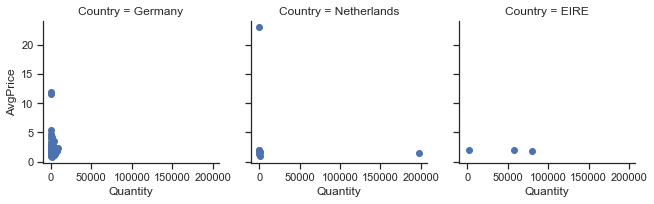

In [128]:
####################
# Graph Section v 2#
####################

# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

#### Step 7.4 What to do now?
이제 무엇을 해야 할까요?  
우리는 우리가 시작한 시점보다 훨씬 나아진 점이 없습니다.  
데이터는 여전히 매우 분산되어 있으며, 그다지 유익한 정보를 포함하고 있는 것처럼 보이지 않습니다.  

그러나, 우리는 여기서 절망해서는 안됩니다!  
우리가 깨달아야 할 두 가지가 있습니다.  
- 데이터가 축에 가깝게 치우쳐 모여있는 것 같습니다. (e.g. `Quantity`=50000 및 `AvgPrice`=5인 값이 없음)  
따라서 이 예시는 추세를 보여줄 수 있을 것입니다.
- 더 많은 데이터가 있습니다. 우리는 3개 국가의 데이터만 살펴보았고, 그 결과는 3개의 서로 다른 그래프에 표시되어 있습니다.

따라서 **`Country`에 관계없이** 데이터를 표시해야 하며, 덜 분산된 그래프를 확인할 수 있을 것으로 기대합니다.  

##### Step 7.4.1 각 `CustomerID`에 대한 데이터를 단일 그래프에 표시하기 (단일 plot)

/var/folders/f8/x5k7p6sd7v7fcpwzjwsdc79h0000gn/T/ipykernel_41989/2907173555.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


[]

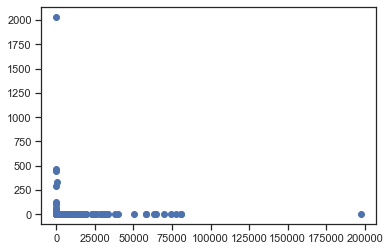

In [129]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()


#Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

##### Step 7.4.2 그래프의 곡선을 보다 명확하게 볼 수 있도록 확대하기

[]

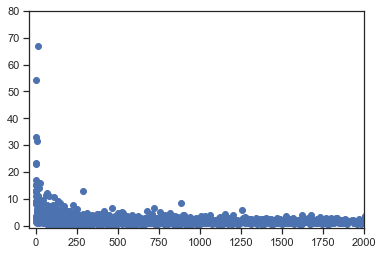

In [130]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)

#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()


#And there is still that pattern, this time in close-up!

### 8. `revenue` (y) 당 `UnitPrice` (x)를 표시하는 꺾은선형 그래프를 plot하기

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 prices [0,50)에 대해 `UnitPrice`를 그룹화하고 `Quantity`와 `Revenue`를 더하기

In [131]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1107774.544
(1, 2]    2691765.110
(2, 3]    2024143.090
(3, 4]     865101.780
(4, 5]    1219377.050
Name: Revenue, dtype: float64

#### 8.3 Plot하기

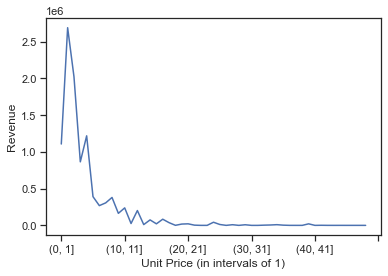

In [132]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

#### 8.4 시각화 자료 개선하기
x축에는 값이 필요합니다.  
y축은 읽기 쉽지 않으므로 Milion 단위로 표시합니다.

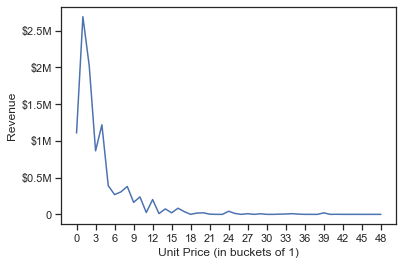

In [133]:
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

#Looks like a major chunk of our revenue comes from items worth $0-$3!